# Measurement of the Average of pulse width in data.

The dataset is taken from [mast website](https://archive.stsci.edu/index.html)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset:
Taking a data  

In [10]:
df = pd.read_csv('lc_data.csv')

In [11]:
df

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,2749.590179,0.004029,129231,88313.766,9.130330,3646.8525,1.663342,91247.920,9.411329,524288,NaN,NaN,NaN,NaN,662.260000,0.000166,752.135031,0.000137,-0.423298,0.039486
1,2749.610611,0.004027,129232,88358.020,9.134828,3649.2266,1.676815,91293.650,9.415535,0,NaN,NaN,NaN,NaN,662.243029,0.000166,752.137374,0.000137,-0.439542,0.042773
2,2749.631043,0.004026,129233,88333.586,9.129923,3653.8452,1.657886,91268.400,9.409822,0,NaN,NaN,NaN,NaN,662.224529,0.000166,752.139425,0.000137,-0.457429,0.045404
3,2749.651475,0.004024,129234,88336.260,9.130495,3647.2966,1.672635,91271.164,9.409987,0,NaN,NaN,NaN,NaN,662.205267,0.000166,752.141153,0.000137,-0.476949,0.047776
4,2749.671907,0.004022,129235,88340.820,9.131834,3649.4330,1.662258,91275.875,9.410720,8192,NaN,NaN,NaN,NaN,662.185597,0.000166,752.143000,0.000136,-0.497196,0.050463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,2818.629099,-0.002192,132610,86947.690,9.339714,9261.0520,1.792665,89836.450,9.615860,0,NaN,NaN,NaN,NaN,662.788064,0.000188,752.106157,0.000148,0.058964,0.074307
3380,2818.649531,-0.002194,132611,86833.470,9.333640,9263.1990,1.788513,89718.445,9.610687,0,NaN,NaN,NaN,NaN,662.844050,0.000189,752.097236,0.000149,0.123420,0.065058
3381,2818.669963,-0.002196,132612,86735.010,9.333527,9271.3060,1.788258,89616.700,9.610253,0,NaN,NaN,NaN,NaN,662.885887,0.000189,752.090999,0.000149,0.172548,0.058538
3382,2818.690395,-0.002197,132613,86564.130,9.329801,9278.8890,1.797470,89440.164,9.604564,0,NaN,NaN,NaN,NaN,662.936082,0.000190,752.082232,0.000149,0.232886,0.048859


I won't be going into detail about what the values represent. <br>This code will give you a generalised method to identify the pulses in the data and calculate the average time period of the pulses.


## Visualization of the data.

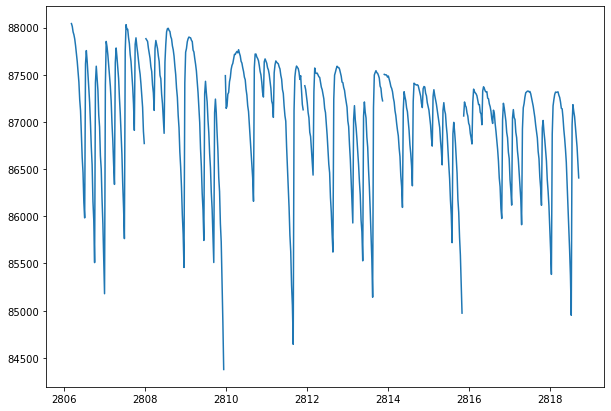

In [12]:
plt.figure(figsize=(10,7))
plt.plot(df['TIME'][2770:],df['SAP_FLUX'][2770:])
plt.show()

## Method:
The code will use the slope to find out the edges of the pulses. When the slope changes abruptly, it implies that the pulses has started or ended.

 Making a function to find the slopes.

In [13]:
def get_slope(x_data, y_data):
    x1_list, x2_list, y1_list, y2_list, slopes = [[] for i in range(5)]
    # the length of both the x and y data must be same.
    for i in range(1,len(x_data)):
        x1 = x_data.values[i-1]
        x2 = x_data.values[i]
        y1 = y_data.values[i-1]
        y2 = y_data.values[i]
        slope = (y2-y1)/(x2-x1)
        
        # saves values:
        slopes.append(slope)
        x1_list.append(x1)
        x2_list.append(x2)
        y1_list.append(y1)
        y2_list.append(y2)
    slopes = np.where(np.isnan(np.array(slopes)),0,np.array(slopes))
    return slopes,np.array(x1_list),np.array(x2_list),np.array(y1_list),np.array(y2_list)

Getting the values from the above function:

In [14]:
slopes,x1,x2,y1,y2 = get_slope(x_data=df['TIME'][3000:],y_data=df['SAP_FLUX'][3000:])

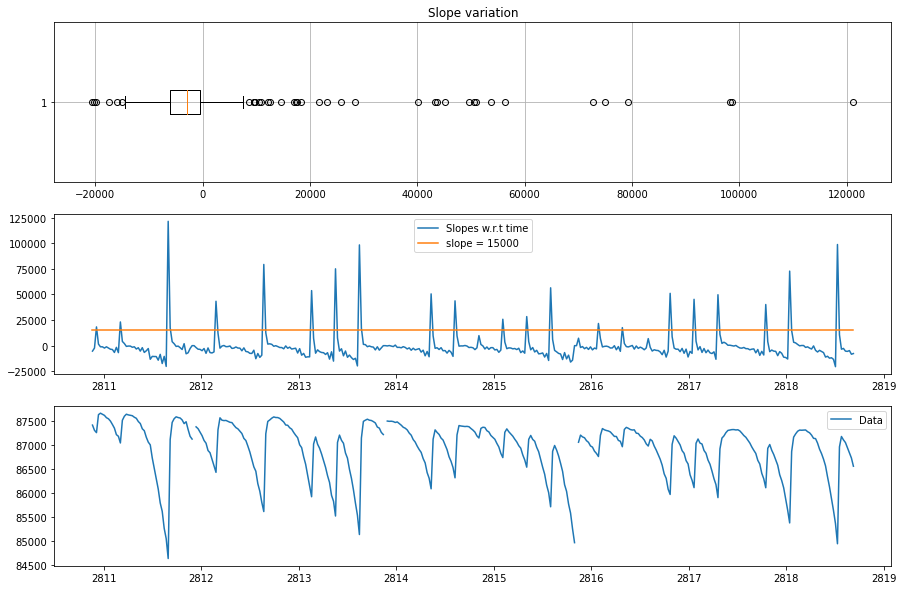

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15,10))
axes[0].set_title('Slope variation')
axes[0].boxplot(slopes,vert=False)
axes[0].grid()

slope_threshold = 15000
axes[1].plot(x1,slopes,label='Slopes w.r.t time')
axes[1].plot(x1,np.repeat(slope_threshold,len(x1)),label=f'slope = {slope_threshold}')
axes[2].plot(x1,y1,label='Data')

axes[1].legend()
axes[2].legend()
plt.show()

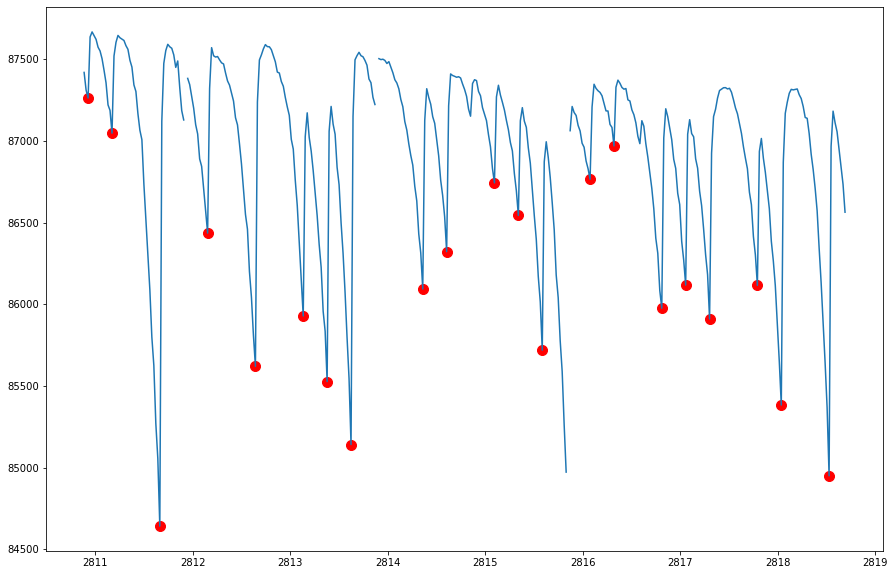

In [21]:
plt.figure(figsize=(15,10))
plt.plot(x1,y1)

# These lists are to get the edges of the pulses
selective_x = []
selective_y = []

# we can then append the lists and plot these points.
# NOTE: Try setting the slope_threshold based on the above graph to different values. 
for i in range(1,len(slopes)):
    if (slopes[i]-slopes[i-1])>slope_threshold:
        # Append the list
        selective_x.append(x1[i])
        selective_y.append(y1[i])
        
# Plot the points(edges):
plt.scatter(selective_x,selective_y, s=100, color='red')

Take the `x component` of the selected points and find the difference between them.

In [22]:
# Get the final time intervals:
time_intervals = []

for i in range(1,len(selective_x)):
    time_diff = selective_x[i]-selective_x[i-1]
    time_intervals.append(time_diff)

time_intervals = np.array(time_intervals)

## Average is:

In [23]:
time_intervals.mean()

0.38003271961972585